<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Valores faltantes</h1>
  <p></p>
</div>


In [1]:
from pandas import DataFrame,read_csv
from matplotlib.pyplot import tight_layout, show,subplot,legend ,subplots, xlabel, style,hist, figure
from numpy import mean, std, nan
from pandas import set_option, cut, Series,qcut
from IPython.display import display
from pandas import DataFrame
from seaborn import boxplot, set,histplot
from os import chdir
# from dotenv import load_dotenv, find_dotenv

chdir("..")
set(style="whitegrid")

## Definición

Los datos son la base de la nueva economía de la información. Cada día se generan 2.5 x 10<sup>18</sup> bytes de datos ([aquí](http://www.vcloudnews.com/every-day-big-data-statistics-2-5-quintillion-bytes-of-data-created-daily/) un interesante *infographic* al respecto), provenientes de sensores, GPSs, redes sociales, mensajes electrónicos, transacciones comerciales, publicaciones regulares, etc. Esos datos permiten generar una gran cantidad de información para atender virtualmente cualquier problema. Sin embargo, antes de poder explotar la información contenida en ellos y antes de poder generar conocimiento de utilidad para la toma de decisiones, es necesario garantizar que los datos se encuentren en 'buenas condiciones'. 

Es una estimación bien conocida en tre los científicos de datos que el 80% del tiempo dedicado a la solución de un problema se invierte en la preparación de los datos: 

![](../images/time.jpg)
![ ](../images/blank.png)

El proceso de mejoramiento de los datos es lo que se denomina **preparación de los datos**. 
![](../images/DataPreparation.png)
![ ](../images/blank.png)
* La *limpieza de datos* consiste en rellenar valores faltantes, suavizar datos con ruido, identificar y remover valor atípicos y resolver inconsistencias. 
* La *integración de datos* es la integración de diversas fuentes de datos: bases de datos, cubos de datos o archivos. 
* La *selección de datos* consiste en seleccionar el conjunto de datos adecuado para analizar el sistema, incluyendo el muestreo. 
* La *selección de características* es un proceso mediante el cual se analizan las variables determinantes para describir los datos. 
* La *transformación de datos* incluye operaciones como normalización, agregación, codificación. 



## Limpieza de los datos 

### Valores faltantes 

El problema de valores faltantes es un problema muy frecuente al tratar de realizar cualquier tarea de análisis de datos y puede deberse a diversas razones: 
* Fallas en los mecanismos de medición (sensores defectuosos, por ejemplo) 
* Integración de conjuntos de datos no bien coordinados (mediciones con diferentes ciclos, por ejemplo) 
* Variables nuevas no consideradas o no disponibles originalmente 
* Respuestas omitidas intencionalmente por la fuente 

![](../images/missingData.png)
![ ](../images/blank.png)

La omisión de valores en el conjunto de datos puede tener diversos efectos y diferentes grados de impacto. En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (*dumb rules*):
La omisión de valores en el conjunto de datos puede tener diversos efectos y diferentes grados de impacto. En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (*dumb rules*):
* Menos de 1%: Trivial (no relevante)
* 1-5%: Manejable
* 5-15%: Manejable mediante métodos sofisticados
* Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación

Considérese el siguiente conjunto de datos tomados del conjunto de datos de diabetes:


Los datos faltantes se refieren a la ausencia de un valor para las observaciones y es una ocurrencia común en la mayoría de los conjuntos de datos. Scikit-learn, la biblioteca de Python de código abierto para el aprendizaje automático, no admite valores perdidos como entrada para los modelos de aprendizaje automático, por lo que debemos convertir estos valores en números. Para seleccionar la técnica de imputación de datos faltantes, es importante conocer la cantidad de información faltante en nuestras variables

In [5]:
df = read_csv("Data/Pima Indian Data Set/pima-indians-diabetes.data-small", names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df.head()

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
display(df.describe())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,20.00000,20.000000,18.000000,11.000000,9.000000,19.000000,20.000000,20.000000,20.00000
mean,4.50000,129.400000,68.555556,32.363636,258.111111,32.578947,0.511650,37.450000,0.65000
std,3.56149,35.354446,16.346333,8.891262,263.487877,6.509103,0.513691,11.591626,0.48936
min,0.00000,78.000000,30.000000,19.000000,83.000000,23.300000,0.134000,21.000000,0.00000
25%,1.00000,106.000000,64.500000,26.000000,94.000000,27.600000,0.198500,30.750000,0.00000
50%,4.50000,117.000000,71.000000,32.000000,168.000000,30.500000,0.374500,32.000000,1.00000
75%,7.25000,152.500000,74.000000,36.500000,230.000000,36.450000,0.560000,50.250000,1.00000
max,10.00000,197.000000,96.000000,47.000000,846.000000,45.800000,2.288000,59.000000,1.00000


Como puede observarse, la variable *count* no es la misma para todas las columnas. Comparando con el despliegue de los datos, las diferencias en el valor de esta variable corresponde a los valores faltantes. Una mayor exploración podemos obtenerla de la siguiente manera:

In [7]:
print ('Tabla de valores nulos')
print (df.isnull().sum(), '\n')

Tabla de valores nulos
emb       0
gl2h      0
pad       2
ept       9
is2h     11
imc       1
fpd       0
edad      0
class     0
dtype: int64 



In [90]:
print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

Contabilidad de valores nulos por columna
emb       0
gl2h      0
pad       2
ept       9
is2h     11
imc       1
fpd       0
edad      0
class     0
dtype: int64 



In [11]:
print ('Porcentaje de datos nulos')
df.isnull().sum() / df.shape[0] * 100


Porcentaje de datos nulos


emb       0.0
gl2h      0.0
pad      10.0
ept      45.0
is2h     55.0
imc       5.0
fpd       0.0
edad      0.0
class     0.0
dtype: float64

Como puede apreciarse, el porcentaje de valores faltantes en este segmento de datos (45% de valores faltantes) está muy por encima de lo que puede tratarse de manera directa, según las reglas anteriores. 

En muchos casos, incluso detectar los valores faltantes es un problema. En nuestros datos originales, lo valores faltantes vienen enmascarados como 0, no como un espacio vacío. En este caso, el procedimiento anterior fallaría pues no existen datos 'no disponibles'. Debemos primero analizar los datos y detectar cómo se manifiestan los valores faltantes. En nuestro ejemplo, asumimos que *ept*, esto es, el 'Espesor de la piel del tríceps' no puede tener un valor de 0 y, por lo tanto, ese valor representa un valor faltante. Para resolver el problema, debemos preparar los datos asignando una etiqueta *NaN* a los valores que consideramos como valores'faltantes': 


In [29]:
df2 = read_csv("Data/Pima Indian Data Set/pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

display(df2, '\n')

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


'\n'

In [16]:
df2.loc[df2['ept'] == 0,'ept'] = nan
df2

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,NaN,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1
5,5,116,74,NaN,0,25.6,0.201,30,0
6,3,78,50,32.0,88,31.0,0.248,26,1
7,10,115,0,NaN,0,35.3,0.134,29,0
8,2,197,70,45.0,543,30.5,0.158,53,1
9,8,125,96,NaN,0,0.0,0.232,54,1


En plataformas para *data science*, como R y Pandas, los valores marcados como 'NaN' suelen ser ignorados en las operaciones: 


In [22]:
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   emb     20 non-null     int64  
 1   gl2h    20 non-null     int64  
 2   pad     20 non-null     int64  
 3   ept     11 non-null     float64
 4   is2h    20 non-null     int64  
 5   imc     20 non-null     float64
 6   fpd     20 non-null     float64
 7   edad    20 non-null     int64  
 8   class   20 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


None

In [20]:
display(df2.describe())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,20.00000,20.000000,20.000000,11.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,4.50000,129.400000,61.700000,32.363636,116.150000,30.950000,0.511650,37.450000,0.65000
std,3.56149,35.354446,26.159631,8.891262,215.843821,9.654424,0.513691,11.591626,0.48936
min,0.00000,78.000000,0.000000,19.000000,0.000000,0.000000,0.134000,21.000000,0.00000
25%,1.00000,106.000000,57.500000,26.000000,0.000000,26.975000,0.198500,30.750000,0.00000
50%,4.50000,117.000000,70.000000,32.000000,0.000000,30.300000,0.374500,32.000000,1.00000
75%,7.25000,152.500000,74.000000,36.500000,114.000000,35.875000,0.560000,50.250000,1.00000
max,10.00000,197.000000,96.000000,47.000000,846.000000,45.800000,2.288000,59.000000,1.00000


In [23]:
print('Suma y promedio de ept: ({}, {})'.format(df2['ept'].sum(), df2['ept'].mean()), '\n')

Suma y promedio de ept: (356.0, 32.36363636363637) 



In [24]:
print('Promedio tomando en cuenta los 0s:', df2['ept'].sum()/20)

Promedio tomando en cuenta los 0s: 17.8



### Tratamiento de valores faltantes 

El método más simple para tratar con el problema de valores faltantes es la *eliminación de casos*, también conocido como *análisis de casos completos. Este método está disponible en todos los paquetes de análisis de datos y es la opción por omisión en la mayoría. 

En Pandas podemos eliminar los valores faltantes de diferentes maneras. *DataFrame.dropna*() elimina todos los renglones en el DataFrame en los que hay al menos un valor *NaN*:

In [25]:
display(df.dropna())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115,70.0,30.0,96.0,34.6,0.529,32,1


El parámetro *tresh* en DataFrame.dropna() permite eliminar todos los renglones que no contengan al menos el número de columnas "limpias" expresado por el prámetro. En los ejemplos a continuación, se conservan 1) sólo los renglones que tienen al menos 8 columnas *limpias* y 2) los renglones que tienen al menos 7 columnas con valores definidos:

In [31]:
from utils.utils import horizontal

horizontal([df.dropna(thresh=7),df.dropna(thresh=8)])

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
10,4,110,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168,74.0,NaN,NaN,38.0,0.537,34,1


### Imputación 

El análisis de casos completos es una opción aceptable si el porcentaje de valores faltantes es pequeño. En la mayoría de los casos, es preferible reemplazar los valores faltantes por valores calculados por omisión o valores calculados. Esta operación se denomina **imputación**. En el siguiente ejemplo, todos los valores *NaN* son reemplazados por 0, lo cual pudiera seguir la lógica de que "si el dato no está disponible es que en realidad era cero.

In [32]:
df3 = df.fillna(0)
horizontal([df,df3,df3.describe()])

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,NaN,0.232,54,1


Sin embargo, en muchos casos un valor por omisión de cero no tiene sentido. En nuestro ejemplo con los datos de diabetes, un valor de cero en la columna *pad* (*Presión diastólica de la sangre*) es imposible en una persona viva. En este caso, una mejor opción es rellenar los valores faltantes por el mínimo registrado:

In [34]:
df3 = df.fillna(df.min())
horizontal([df3,df3.describe()])

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,83.0,33.6,0.627,50,1
1,1,85,66.0,29.0,83.0,26.6,0.351,31,0
2,8,183,64.0,19.0,83.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,19.0,83.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,30.0,19.0,83.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,19.0,83.0,23.3,0.232,54,1


Otras alternativas comunes son rellenar los valores faltantes con el valor máximo o con valores estadísticos.

Reemplazar los valores faltantes por el valor promedio de esa variable es uno de los métodos más comunes de imputación, sin embargo la media es una medida vulnerable a valores atípicos. Una alternativa más robusta ante este problema es la mediana. 

In [36]:
print("Rellenando con el valor máximo \n")

df3 = df.fillna(df.max())
horizontal([df3,df3.describe()])

Rellenando con el valor máximo 



,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,846.0,33.6,0.627,50,1
1,1,85,66.0,29.0,846.0,26.6,0.351,31,0
2,8,183,64.0,47.0,846.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,47.0,846.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,96.0,47.0,846.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,47.0,846.0,45.8,0.232,54,1


In [37]:
print("Rellenando con la media \n")
df3 = df.fillna(df.mean())
horizontal([df3,df3.describe()])

Rellenando con la media 



,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.000000,35.000000,258.111111,33.600000,0.627,50,1
1,1,85,66.000000,29.000000,258.111111,26.600000,0.351,31,0
2,8,183,64.000000,32.363636,258.111111,23.300000,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,32.363636,258.111111,25.600000,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115,68.555556,32.363636,258.111111,35.300000,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,32.363636,258.111111,32.578947,0.232,54,1


### Rellene los valores faltantes con los anteriores

Otra alternativa común es rellenar los valores faltantes con el valor no nulo previo o el siguiente:

In [41]:
# this is equivalent to both method='ffill' and .ffill()
print("Replicar hacia enfrente\n")
df.fillna(method='pad')

Replicar hacia enfrente



,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,29.0,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,35.0,168.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,50.0,32.0,88.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,45.0,543.0,30.5,0.232,54,1


### Rellena con los siguientes

In [107]:
 # this is equivalent to .bfill()
print("Replicar hacia atrás\n", df.fillna(method='bfill'))

Replicar hacia atrás
     emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0   94.0  33.6  0.627    50      1
1     1    85  66.0  29.0   94.0  26.6  0.351    31      0
2     8   183  64.0  23.0   94.0  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  32.0   88.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  70.0  45.0  543.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  23.0  846.0  37.6  0.232    54      1
10    4   110  92.0  23.0  846.0  37.6  0.191    30      0
11   10   168  74.0  23.0  846.0  38.0  0.537    34      1
12   10   139  80.0  23.0  846.0  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  84.0  47.0  230.0  

Esta forma de tratar el problema de valores faltantes es muy común en análisis de series de tiempo. Esta estrategia suele designarse como *último valor conocido* y equivale a asumir que el sistema no pudo cambiar demasiado desde la última medición. En otros casos debe anaizarse si los datos realmente tienen una estructura local; esto es, determinar si tiene sentido esperar que los registros vecinos tengan valores cercanos. en el caso del conjunto de datos de diabetes, esta suposición no es válida.

Podemos también limitar el número de registros que son modificados de esta forma:

In [108]:
print(df.fillna(method='pad', limit=1))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0  29.0    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  35.0  168.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  50.0  32.0   88.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  45.0  543.0  30.5  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  72.0  19.0  175.0  30.0  0.484    32     

### Interpolación
La interpolación es un método formal para estimar valores en una serie de datos. La idea consiste en suponer que todos los puntos en la serie se encuentran sobre una curva subyacente, aunque desconocida. 
La forma más simple de interpolación es la *lineal*. En este caso se parte de dos puntos conocidos y los puntos intermedios (faltantes) se calculan como si estuvieran colocados sobre la línea recta que une a los puntos conocidos.



https://es.wikipedia.org/wiki/Spline

![](images/interpolar.png)

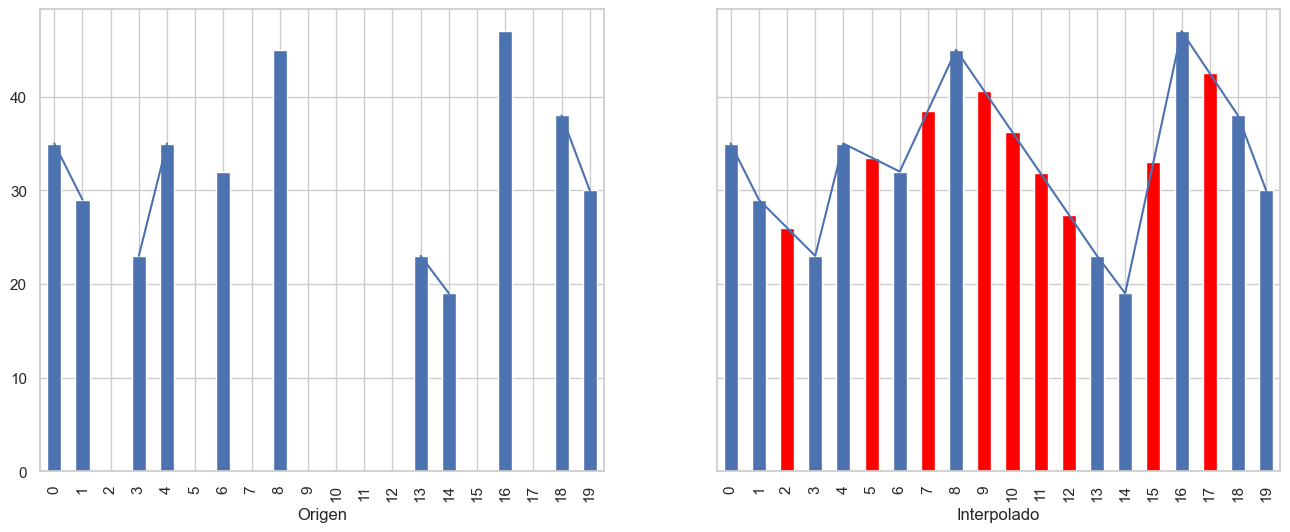

In [51]:

# Crear subplots
fig, axes = subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(16, 6))

# Graficar el primer gráfico
df['ept'].plot(ax=axes[0])
axes[0].set_xlabel("Origen")  # Agregar etiqueta al eje x del primer gráfico
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

# interpolación 
dfi = df['ept'].interpolate()

# Graficar el segundo gráfico
dfi.plot(ax=axes[1])
axes[1].set_xlabel("Interpolado")  # Agregar etiqueta al eje x del segundo gráfico
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

# Mostrar los gráficos
show()


La aproximación lineal, aunque es la más simple, es la menos natural. Es posible utilizar cualquier otro conjunto de curvas, típicamente de la forma, que se ajusten a los datos conocidos. A continuación se presentan ajustes a curvas cuadráticas y cúbicas:

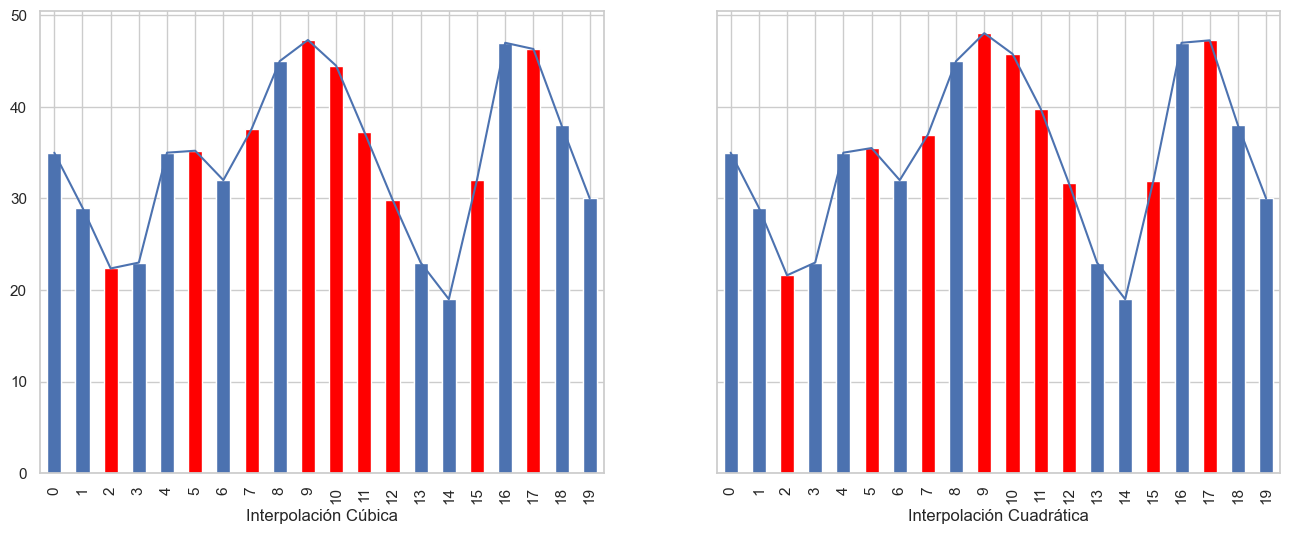

In [55]:

# Crear subplots
fig, axes = subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(16, 6))

# Graficar el primer gráfico (interpolación cuadrática)
dfi = df['ept'].interpolate(method="quadratic")
dfi.plot(ax=axes[0])
axes[0].set_xlabel("Interpolación Cúbica")  # Etiqueta del eje x del primer gráfico

dfi.plot(ax=axes[0], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

# Graficar el segundo gráfico (interpolación cúbica)
dfi = df['ept'].interpolate(method="cubic")
dfi.plot(ax=axes[1])
axes[1].set_xlabel("Interpolación Cuadrática")  # Etiqueta del eje x del segundo gráfico

dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

# Mostrar los gráficos
show()

# For a floating-point index, use method='values'

En pandas, la función de interpolación tiene un parámetro llamado `method` que controla el método de interpolación a utilizar.

Si el índice de los datos es de tipo flotante (por ejemplo, números decimales), se puede utilizar el valor `'values'` como argumento para el parámetro `method`. Esto significa que pandas realizará la interpolación basada en los valores numéricos de los índices, en lugar de utilizar el propio índice como referencia.

Aquí hay un ejemplo de cómo se podría utilizar este enfoque:

```python
# Interpolación utilizando 'values' para un índice de tipo flotante
dfi = df.interpolate(method='values')
```

En este caso, la interpolación se realizaría considerando los valores numéricos de los índices flotantes en lugar de tratar los índices como valores categóricos o fechas. Este enfoque puede ser útil en situaciones en las que se desea una interpolación basada estrictamente en los valores numéricos de los índices, especialmente cuando los índices son flotantes.

https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html


El método de interpolación apropiado dependerá del tipo de datos con el que esté trabajando.

- Si se trata de una serie temporal que está creciendo a un ritmo creciente, method='quadratic'puede ser apropiado.

- Si tiene valores aproximados a una función de distribución acumulativa, entonces method='pchip'debería funcionar bien.

- Para completar los valores faltantes con el objetivo de un trazado suave, considere method='akima'.

### Ejemplo

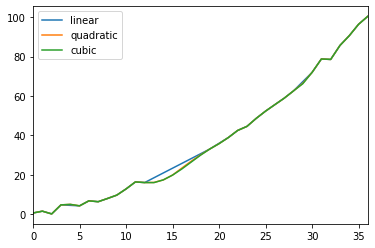

In [113]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ['linear', 'quadratic', 'cubic']

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

df.plot()

Cualquier otra técnica de predicción puede ser empleada para rellenar los valores faltantes. Una de las más importantes es el razonamiento basado en casos ([RBC](https://en.wikipedia.org/wiki/Case-based_reasoning)). 

<hr style="border-width: 3px;">

### Tarea 2

* Analice los problemas de valores faltantes en el conjunto de datos *Pima Indians Diabetes* completo. 
* Realice la imputación de los datos utilizando 3 aproximaciones diferentes y compare los resultados.
* Realice una estimación de valores faltantes mediante interpolación.

**Fecha de entrega**: 